In [1]:
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import classification_report
import numpy as np
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [4]:
# 1. Charger tes données
df = pd.read_csv("../datas/ECOLAB_3/E3_all.csv", sep=',')
len(df)

891762

In [3]:
df.size

95421500

In [12]:
df['ecart_temp_C3'] = df['TEMPERATURE_CONSIGNE [R]_C3'] - df['TEMPERATURE_REPRISE [R]_C3']
df['alerte_temp_C3'] = (df['ecart_temp_C3'].abs() > 4).astype(int)


In [13]:
# nombre de NaN dans y
df = df.dropna(subset=['ecart_temp_C3'])
print(df['ecart_temp_C3'].isna().sum())  # nombre de NaN dans y


0


/home/octopus/octobrain/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


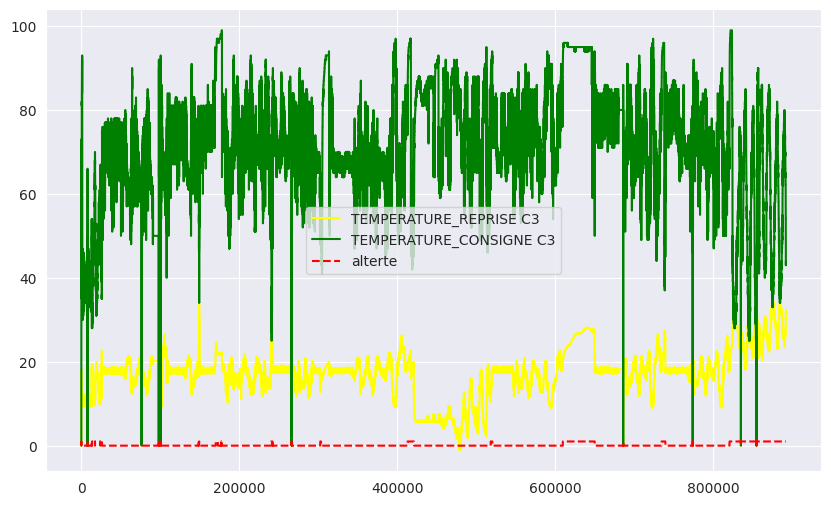

In [14]:

plt.figure(figsize=(10, 6))
plt.plot(df['TEMPERATURE_REPRISE [R]_C3'], label="TEMPERATURE_REPRISE C3", color="yellow")
plt.plot(df['HYGROMETRIE_CELLULE [R]_C3'], label="TEMPERATURE_CONSIGNE C3", color="green")
#plt.plot(df['PRESSION_CO2_HUMIDE [R]'], label="TEMPERATURE_CONSIGNE", color="purple")

plt.plot(df['alerte_temp_C3'], label="alterte", color="red", linestyle="dashed")

plt.legend()
plt.show()


In [15]:
df.to_csv('../datas/ECOLAB_3/E3_all_alert.csv', index=False)

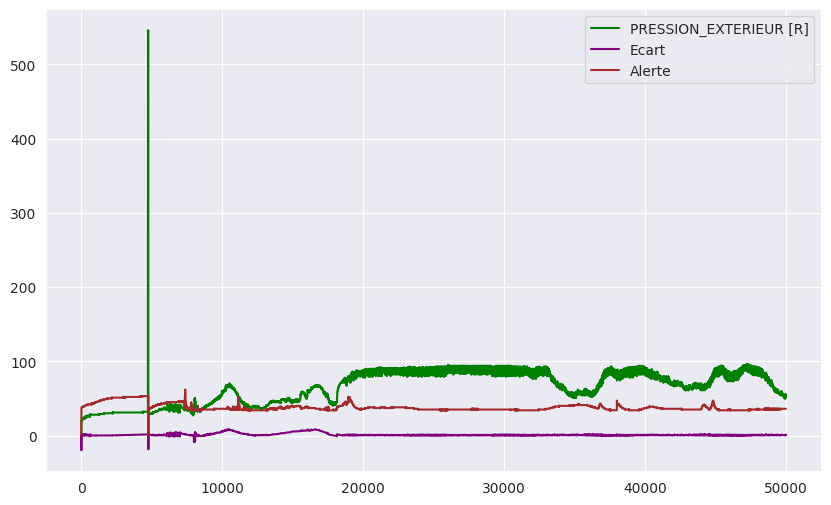

In [25]:
df = df.iloc[0:50000]
plt.figure(figsize=(10, 6))
#plt.plot(df['TEMPERATURE_CONSIGNE [R]'], label="ecart", color="purple", linestyle="dashed")
#plt.plot(df['TEMPERATURE_REPRISE [R]'], label="TEMPERATURE_REPRISE", color="yellow")
#plt.plot(df['POIDS_TOTAL [R]'], label="TEMPERATURE_CONSIGNE [R]", color="green", linestyle="dashed")
plt.plot(df['HYGROMETRIE_CELLULE [R]'], label="", color="green")
plt.plot(df['ecart_temp'], label="Ecart", color="purple")
plt.plot(df['PRESSION_CO2_HUMIDE [R]'], label="Alerte", color="brown")
#plt.plot(df['DEFAUT_HP [B]'], label="", color="green")
#plt.plot(df['TEMP_ENTREE_INF_ECORIUM [R]'], label="Alterte", color="yellow", linestyle="dashed")

plt.legend()
plt.show()

In [ ]:
#X = df.drop(columns=['ecart_temp', 'TEMPERATURE_REPRISE [R]' , 'alerte_temp'])
#y = df[['ecart_temp','TEMPERATURE_REPRISE [R]' , 'alerte_temp']]

# Séparation des features (X) et de la variable cible continue (y)
X = df.drop(columns=['ecart_temp', 'alerte_temp', 'HYGROMETRIE_CONSIGNE [I]' , 'TEMPERATURE_REPRISE [R]' , 'TEMPERATURE_CONSIGNE [R]', 'HYGROMETRIE_CELLULE [R]' , 'CONSIGNE_VENTILATION [I]' , 'CONSIGNE_TEMP_FOND [R]' , 'CONSIGNE_TEMP_INF [R]', 'POIDS_EAU_CONSIGNE [R]' , 'CONSIGNE_TEMP_SUP [R]' ,'PRESSION_CO2_HUMIDE [R]' ,'TEMPERATURE_MOY_INF [R]'])
y = df['ecart_temp']

# Division du dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Utilisation d'un arbre de régression
model = DecisionTreeRegressor(max_depth=20)
model.fit(X_train, y_train)

# Affichage de l'arbre
plt.figure(figsize=(24, 6))
plot_tree(model, feature_names=X.columns, filled=True, rounded=True)
plt.title("Arbre de décision : prédiction de l'écart de température")
plt.show()

In [ ]:
importances = model.feature_importances_
features = X.columns

# Affichage graphique
plt.barh(features, importances)
plt.title("Importance des paramètres dans l'arbre")
plt.xlabel("Poids (0 à 1)")
plt.show()
for i in range(len(importances)):
    print(features[i], importances[i])

In [ ]:
df_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
})
df_importances = df_importances.sort_values(by='Importance', ascending=False)

# Garder uniquement les 10 premières
top = df_importances.head(25)

# Afficher les résultats
print(top)

In [ ]:
# 1. Récupère les importances
import seaborn as sns


top_features = top['Feature'].tolist()

# 3. Extraire ces colonnes du DataFrame original
df_top = df[top_features]
df_top = pd.concat([df_top, df['ecart_temp']], axis=1)
# 4. Calcul des corrélations
correlation_matrix = df_top.corr()

# 5. Affichage de la heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Heatmap des 20 variables les plus importantes")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<Axes: xlabel='index', ylabel='TEMP_SORTIE_FOND_ECORIUM [R]'>

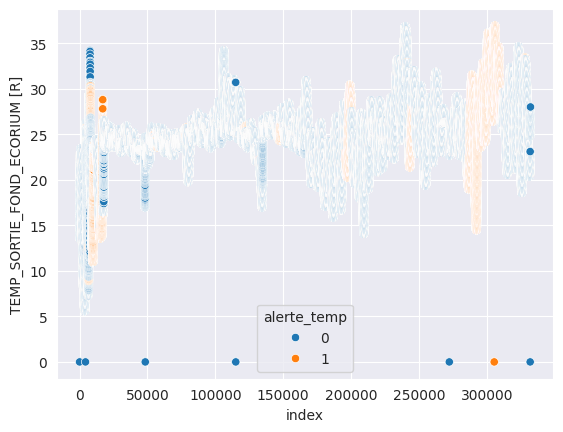

In [15]:
df['index'] = df.index
df['index'] = df.index
sns.scatterplot(data=df,
                x='index',
                y='TEMP_SORTIE_FOND_ECORIUM [R]',
                hue='alerte_temp')

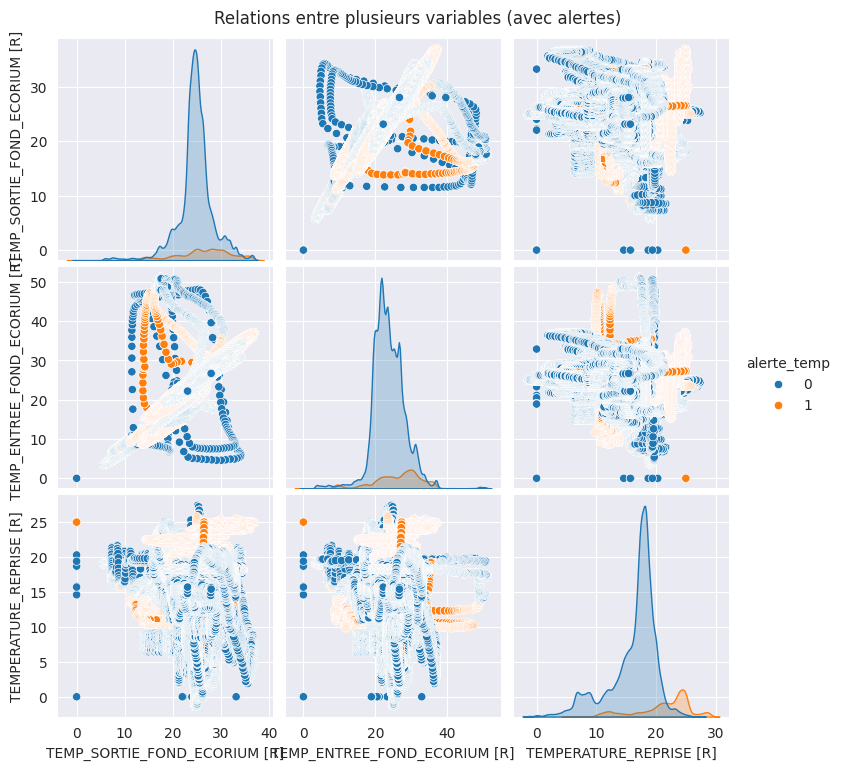

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sélection de quelques colonnes importantes
cols = ['TEMP_SORTIE_FOND_ECORIUM [R]', 'TEMP_ENTREE_FOND_ECORIUM [R]', 'TEMPERATURE_REPRISE [R]', 'alerte_temp']

# Pairplot avec coloration selon l’alerte
sns.pairplot(df[cols], hue='alerte_temp')
plt.suptitle("Relations entre plusieurs variables (avec alertes)", y=1.02)
plt.show()


In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


X = df[['TEMPERATURE_MOY_INF [R]' , 'PRESSION_EXTERIEUR [R]' , 'PRESSION_CO2_HUMIDE [R]']]  # ou garder ecart_temp si utile
y = df['alerte_temp']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Évaluation
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.99      1.00      0.99     68590
           1       0.98      0.95      0.97     10516

    accuracy                           0.99     79106
   macro avg       0.99      0.97      0.98     79106
weighted avg       0.99      0.99      0.99     79106



In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

X = df[['TEMPERATURE_MOY_INF [R]', 'PRESSION_EXTERIEUR [R]', 'PRESSION_CO2_HUMIDE [R]']]
y = df['alerte_temp']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor()
model.fit(X_train, y_train)

# Évaluation
y_pred = model.predict(X_test)

# Métriques de régression
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE : {mae:.4f}")
print(f"RMSE : {rmse:.4f}")
print(f"R² : {r2:.4f}")


MAE : 0.0130
RMSE : 0.0824
R² : 0.9411


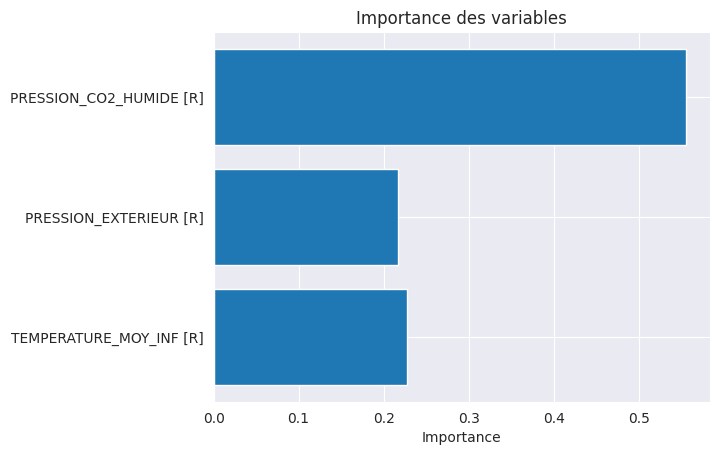

In [8]:
import matplotlib.pyplot as plt

importances = model.feature_importances_
feature_names = X.columns
plt.barh(feature_names, importances)
plt.title("Importance des variables")
plt.xlabel("Importance")
plt.show()


In [77]:
df.size

50232056

In [78]:
print(df['alerte_temp'])

0         0
1         1
2         1
3         1
4         1
         ..
395523    1
395524    1
395525    1
395526    1
395527    1
Name: alerte_temp, Length: 395528, dtype: int64


In [82]:
#df = df.drop(columns=['index'])
df = df.iloc[0:100]
df.size
for i in df.index:
    if df.loc[i, 'alerte_temp'] == 1 :
        df.loc[i-15:i] = 1
        print("oui")



12700

In [80]:
df.size

12700

In [49]:
df.to_csv('../datas/C1_C4_Alerte_Formates.csv' , sep=',')


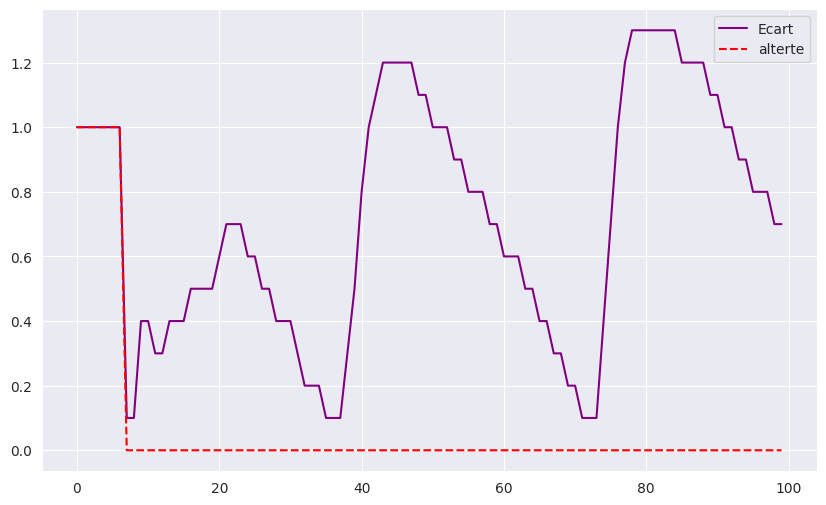

In [50]:
df = df.iloc[0:5000]
plt.figure(figsize=(10, 6))
#plt.plot(df['TEMPERATURE_REPRISE [R]'], label="TEMPERATURE_REPRISE", color="yellow")
#plt.plot(df['TEMPERATURE_CONSIGNE [R]'], label="TEMPERATURE_CONSIGNE", color="green")
plt.plot(df['ecart_temp'], label="Ecart", color="purple")
plt.plot(df['alerte_temp'], label="alterte", color="red", linestyle="dashed")
plt.legend()
plt.show()